## CDAPⅠ-Certified-Data-Analyst-using-Python-4

In [1]:
import pandas as pd 
import numpy as np

from scipy import stats

#### 1. S 회사의 인사부서 직무능력 평가가 평균 73점이 나왔다. 
#### 같은 시험을 본 사원 A씨의 직무능력 평가 점수가 81점일 때, A사원의 점수가 인사부서의 평균보다 높은지 가설검정을 실시하시오. 
#### (모집단의 표준편차는 3점)

In [2]:
import scipy as sp
import scipy.stats as st

In [3]:
xbar = 81
mu = 73
n = 100
sigma = 3

z = (xbar - mu) / np.sqrt(sigma / n)
print('z score: ', z)

z score:  46.18802153517006


In [4]:
pval = 2 * (1 - st.norm.cdf(z))
print('p-value: ', pval)

p-value:  0.0


* 귀무가설 : A사원의 평균과 인사부서의 평균은 같다.
* 대립가설 : A사원의 평균이 인사부서의 평균보다 높다.
* 통계적 결론 : A사원의 평균이 인사부서의 평균보다 높다.
* 사실적 결론 : A사원의 평균이 인사부서의 평균보다 높다.

#### 2. P 회사의 PCB 공정에서 품질검사를 실시해 평균 불량률을 구했는데, 0.03 이 나왔다. 
#### P 회사에서 같은 공정에서 새로운 장비를 도입하여, 공정 불량률을 측정했을때, 아래와 같이 도출되었다. 
#### 새로운 장비의 도입이 불량률을 개선하였는지 가설검정을 실시하시오.

In [5]:
data = [0.01,0.003,0.031,0.02,0.017,0.04,0.001,0.03,0.023]

In [6]:
from scipy.stats import ttest_1samp

t_result = stats.ttest_1samp(data, 0.03)
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

In [7]:
print('t-statistic: ', t)
print('p-value: ', p)

t-statistic:  -2.406
p-value:  0.043


p-value가 0.05보다 작으므로 귀무가설을 기각하고 대립가설을 채택한다.

* 귀무가설 : 새로운 장비 도입 후 불량률의 평균은 도입 전 불량률의 평균과 같다.
* 대립가설 : 새로운 장비 도입 후 불량률의 평균은 도입 전 불량률의 평균보다 낮다.
* 통계적 결론 : 새로운 장비 도입 후 불량률의 평균은 도입 전 불량률의 평균보다 낮다. 즉, 새로운 장비의 도입은 불량률을 개선하였다.
* 사실적 결론 : 새로운 장비 도입 후 불량률의 평균은 도입 전 불량률의 평균보다 낮다. 즉, 새로운 장비의 도입은 불량률을 개선하였다.

#### 3. P 회사의 PCB 공정에서 공정 타입 별로 공정 시간(ms)의 차이가 있는지 가설검정을 실시하시오. (유의수준 α=0.05)

In [8]:
df1 = pd.DataFrame(
    {'Etching':[0.01,0.05,0.11,0.075,0.021,0.055,0.001,0.033,0.098],
     'Lithography':[0.013,0.054,0.091,0.045,0.081,0.075,0.061,0.083,0.094],
     'Development':[0.077,0.012,0.11,0.025,0.021,0.045,0.031,0.033,0.092]})
print(df1.shape)
df1

(9, 3)


,Etching,Lithography,Development
0,0.010,0.013,0.077
1,0.050,0.054,0.012
2,0.110,0.091,0.110
3,0.075,0.045,0.025
4,0.021,0.081,0.021
5,0.055,0.075,0.045
6,0.001,0.061,0.031
7,0.033,0.083,0.033
8,0.098,0.094,0.092


In [9]:
df_e = df1[['Etching']]
df_l = df1[['Lithography']]
df_d = df1[['Development']]

f_result = stats.f_oneway(df_e, df_l, df_d)
f, p = f_result.statistic.round(3), f_result.pvalue.round(3)

print('f-statistic: ', f)
print('p-value: ', p)

f-statistic:  [0.723]
p-value:  [0.495]


p-value가 0.05보다 크므로 귀무가설을 채택한다.

* 귀무가설 : 공정 타입 별로 공정시간의 차이가 없다. (모든 공정 타입의 공정시간의 평균은 같다.)
* 대립가설 : 적어도 하나는 공정 타입별 공정시간의 차이가 있다.
* 통계적 결론 : 공정 타입 별로 공정시간의 차이가 없다.
* 사실적 결론 : 아래와 같이 실제 평균을 구해보면 공정 타입 별로 공정시간의 평균의 차이가 존재한다.

In [10]:
print(df_e.mean())
print(df_l.mean())
print(df_d.mean())

Etching    0.050333
dtype: float64
Lithography    0.066333
dtype: float64
Development    0.049556
dtype: float64


#### 4. 쇼핑몰을 운영하고 있는 'I' 회사에서, 온라인 마케팅을 실시하였다. 
#### 대표적인 두 채널(인스타그램/페이스북)의 시간 별 유입수를 추출하였다. 
#### 두 채널의 모평균에 차이 있는지 가설검정을 실시하시오. (유의수준 α = 0.05)

In [11]:
df1 = pd.DataFrame(
    {'time':['00','01','02','03','04','05','06','07','08','09','10','11','12'],
     'instargram':[730,703,302,101,80,45,50,60,75,55,240,134,342],
     'facebook':[630,696,354,130,123,64,56,48,33,99,89,85,342]})
print(df1.shape)
df1

(13, 3)


,time,instargram,facebook
0,00,730,630
1,01,703,696
2,02,302,354
3,03,101,130
4,04,80,123
5,05,45,64
6,06,50,56
7,07,60,48
8,08,75,33
9,09,55,99


In [12]:
df_chi = pd.pivot_table(df1, index='time')
df_chi

,facebook,instargram
time,,
00,630,730
01,696,703
02,354,302
03,130,101
04,123,80
05,64,45
06,56,50
07,48,60
08,33,75


In [13]:
chi, pval, dof, expected = stats.chi2_contingency(df_chi.T)

print('chisq:{0:0.3f}'.format(chi))
print('p-value:{0:0.3f}'.format(pval))

chisq:133.552
p-value:0.000


p-value가 0.05보다 작으므로 대립가설을 채택한다.

* 귀무가설 : 채널별로 시간별 유입수의 차이가 없다.
* 대립가설 : 채널별로 시간별 유입수의 차이가 있다.
* 통계적 결론 : 채널별로 시간별 유입수의 차이가 있다.
* 사실적 결론 : 채널별로 시간별 유입수의 차이가 있다.

#### 아래 Example 파일을 이용하여 통계분석을 실시 하시오.

In [14]:
df1 = pd.read_csv('4_data.csv')
print(df1.shape)
df1.head(3)

(10000, 10)


,회원코드,프로그램,상태,프로그램가격,최종결제금액,결제시각,결제유형,채널,보조식품가격,보조식품(추가구매)
0,Y9RY2VSI,체중감량 프로그램 (타입B),completed,112500,112500,2017-04-14 오후 7:03:29.976000,Recurring,others,0,구매안함
1,3GTN3S3B,체중감량 프로그램 (타입B),completed,44780,44780,2017-05-23 오후 8:53:54.368000,Recurring,others,0,구매안함
2,6B0IG276,체중감량 프로그램 (타입 A),completed,132000,149000,2017-08-23 오후 11:39:21.840000,Recurring,facebook,17000,식이요법보조제A


#### 5. 위의 데이터에서 각 "채널" 별 최종 결제금액의 차이가 있는지 검정하려 한다. 
#### Pivot_table을 이용하여, 각 채널 별 최종 결제금액의 평균을 계산하시오.

In [15]:
df_channe = pd.pivot_table(df1, index='채널', values='최종결제금액', aggfunc=np.mean)
df_channel

,최종결제금액
채널,
direct,105512.323232
email,113118.376384
facebook,119932.625000
google,105529.000000
instagram,107958.181818
naver,110497.274529
others,107445.820144


#### 6. 위의 Pivot 결과를 이용하여, Bar Plot 시각화를 실시하시오.

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl # 그래프옵션

# 그래프 시각화 옵션 설정 함수 
%matplotlib inline

# 그래프 한글설정
mpl.rc('font',family = "Malgun Gothic")

#그래프의 한글을 더욱 선명하게 출력
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

#그래프에서 음수값이 나올때, 깨지는 현상 방지
mpl.rc('axes', unicode_minus =False)

Text(0, 0.5, 'Mean of Price')

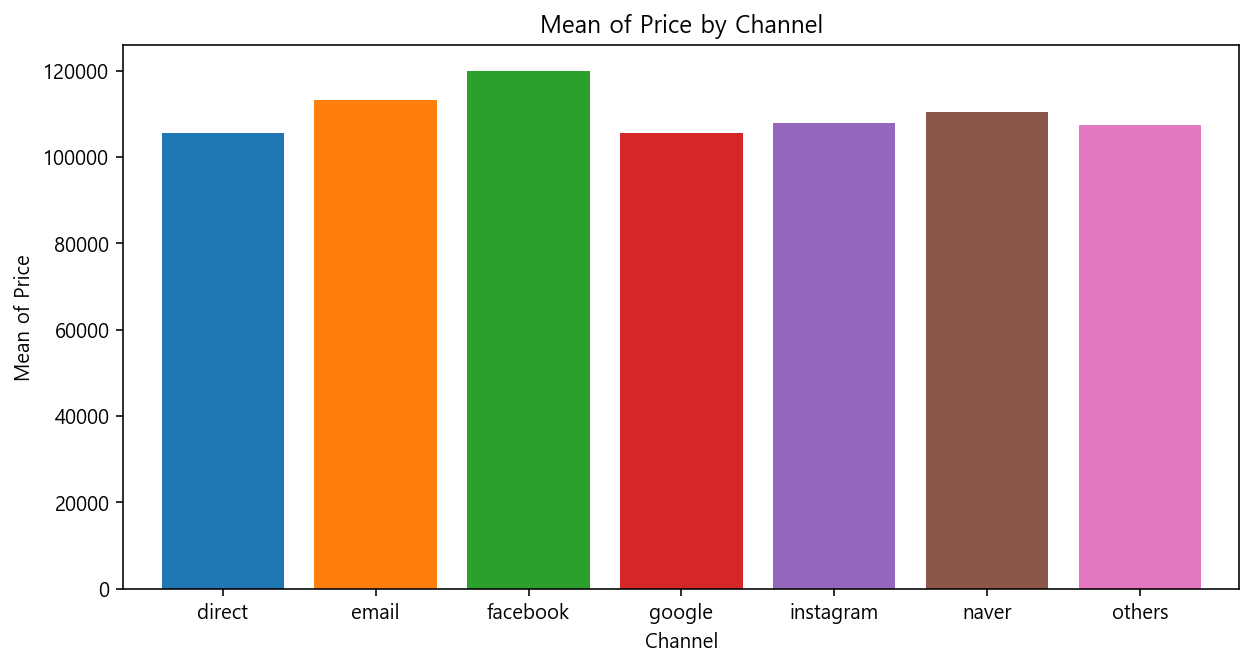

In [17]:
df_channel['최종결제금액'].plot(kind='bar', legend=False, title='Mean of Price by Channel', figsize=(10,5), 
                          color=['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink'], 
                         width=0.8)
plt.xticks(rotation=360)
plt.xlabel('Channel')
plt.ylabel('Mean of Price')

#### 7. 각 채널별 최종결제금액 평균의 차이가 있는지 통계적 가설검정을 실시하시오.

In [18]:
df_ch1 = df1[['채널', '최종결제금액']]
df_ch1

,채널,최종결제금액
0,others,112500
1,others,44780
2,facebook,149000
3,naver,112500
4,facebook,44780
...,...,...
9995,facebook,112500
9996,facebook,129500
9997,facebook,129500
9998,facebook,129500


In [19]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('최종결제금액 ~ C(채널)', data = df_ch1).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(채널),2.871153e+11,6.0,113.525631,4.181449e-139
Residual,4.212182e+12,9993.0,NaN,NaN


p-value가 0.05보다 작으므로 귀무가설을 기각하고 대립가설을 채택한다.

* 귀무가설 : 채널별 최종결제금액 평균의 차이가 없다.
* 대립가설 : 채널별 최종결제금액 평균의 차이가 있다.
* 통계적 결론 : 채널별 최종결제금액 평균의 차이가 있다.
* 사실적 결론 : 채널별 최종결제금액 평균의 차이가 있다.

#### 8. Pivot_table을 이용하여, 각 채널 별 최종 결제금액의 총합을 계산하시오.

In [20]:
df_channel2 = pd.pivot_table(df1, index='채널', values='최종결제금액', aggfunc=np.sum)
df_channel2

,최종결제금액
채널,
direct,31337160
email,30655080
facebook,825136460
google,12663480
instagram,3562620
naver,111491750
others,149349690


#### 9. 위의 Pivot 결과를 이용하여, Bar Plot 시각화를 실시하시오.

Text(0, 0.5, 'Sum of Price')

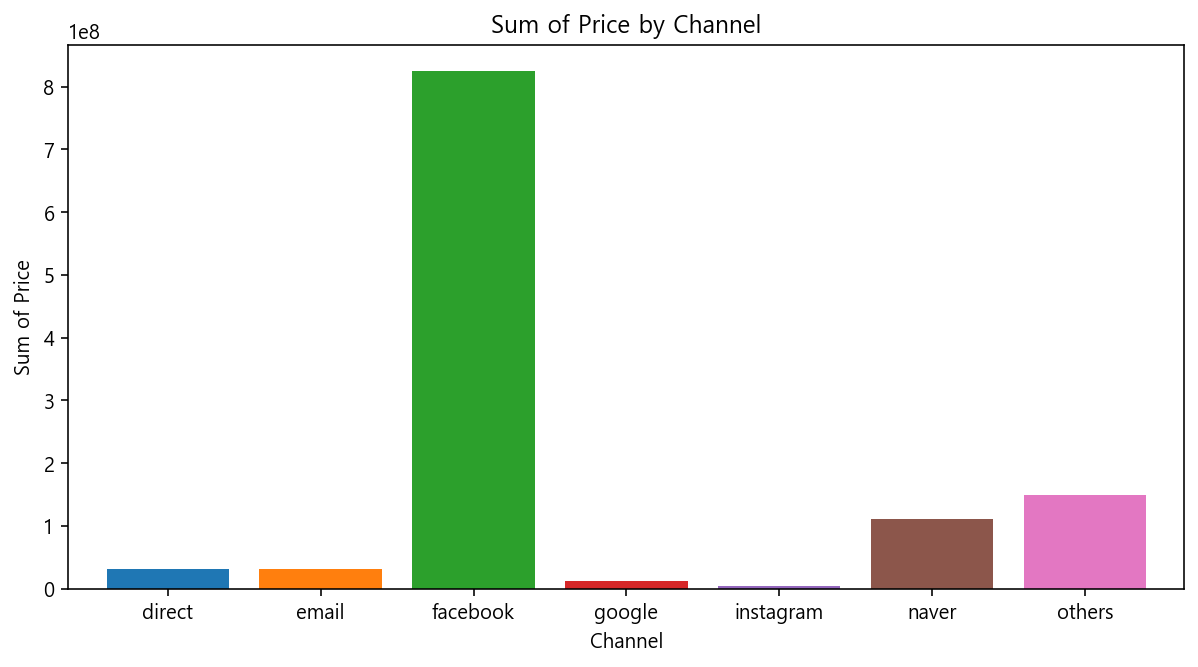

In [21]:
df_channel2['최종결제금액'].plot(kind='bar', legend=False, title='Sum of Price by Channel', figsize=(10,5), 
                          color=['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink'], 
                         width=0.8)
plt.xticks(rotation=360)
plt.xlabel('Channel')
plt.ylabel('Sum of Price')

#### 위의 결과를 바탕으로 'Facebook' 채널에 대해 마케팅을 강화하고자 한다. 

#### 10. 불러온 데이터에서, 'Facebook' 채널에 해당하는 Row만 추출하여, 새로운 데이터 프레임으로 선언하고, 상위 5개 항목에 대해 출력하시오. 

In [22]:
df_facebook = df1[df1['채널']=='facebook']
df_facebook.head(5)

,회원코드,프로그램,상태,프로그램가격,최종결제금액,결제시각,결제유형,채널,보조식품가격,보조식품(추가구매)
2,6B0IG276,체중감량 프로그램 (타입 A),completed,132000,149000,2017-08-23 오후 11:39:21.840000,Recurring,facebook,17000,식이요법보조제A
4,1ELG96TX,체중감량 프로그램 (타입B),completed,44780,44780,2017-05-07 오후 5:50:30.944000,Recurring,facebook,0,구매안함
8,U9AELHAT,체중감량 프로그램 (타입 A),completed,112500,129500,2017-08-09 오후 3:24:28.296000,Recurring,facebook,17000,식이요법보조제A
9,BXOWUYDX,체중감량 프로그램 (타입 A),completed,112500,112500,2017-08-03 오후 9:03:44.352000,Recurring,facebook,0,구매안함
10,0VRP0TMF,체중감량 프로그램 (타입 A),cancelled,112500,112500,2017-07-30 오전 9:49:03.624000,Recurring,facebook,0,구매안함


#### 11. 추출된 'facebook' 채널 데이터를 이용하여, 해당 데이터의 '프로그램' Column의 항목 별 Count를 시각화 하시오.

<function matplotlib.pyplot.show(*args, **kw)>

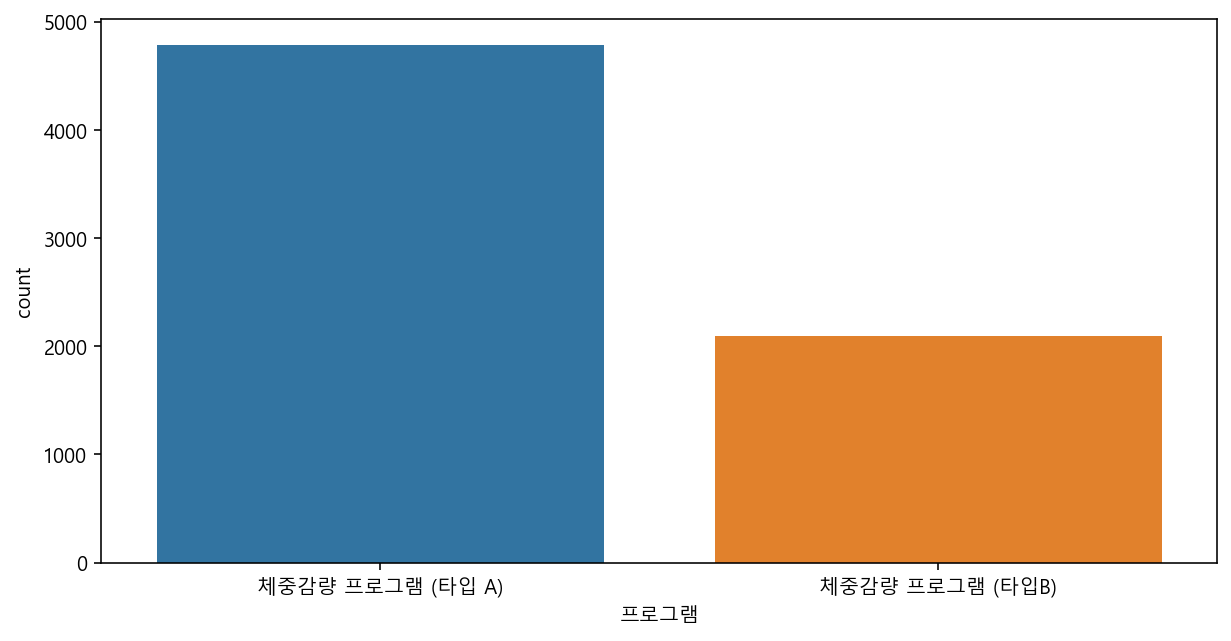

In [23]:
plt.figure(figsize=(10,5))
sns.countplot(x='프로그램', data=df_facebook)
plt.show

#### 12. apply 함수를 활용하여, 전체 데이터의 '결제시각'데이터를 'datetime' 타입으로 변환하시오.

In [24]:
from datetime import datetime

In [25]:
df1['결제시각(clean)'] = df1.결제시각.str[0:4] + df1.결제시각.str[5:7] + df1.결제시각.str[8:10]

In [26]:
df1['결제시각(clean)'] = pd.to_datetime(df1['결제시각(clean)'], format = '%Y%m%d').dt.strftime("%Y-%m-%d")

In [27]:
df1["결제시각(clean)"] = df1["결제시각(clean)"].astype('datetime64[ns]')

In [28]:
df1.head(5)

,회원코드,프로그램,상태,프로그램가격,최종결제금액,결제시각,결제유형,채널,보조식품가격,보조식품(추가구매),결제시각(clean)
0,Y9RY2VSI,체중감량 프로그램 (타입B),completed,112500,112500,2017-04-14 오후 7:03:29.976000,Recurring,others,0,구매안함,2017-04-14
1,3GTN3S3B,체중감량 프로그램 (타입B),completed,44780,44780,2017-05-23 오후 8:53:54.368000,Recurring,others,0,구매안함,2017-05-23
2,6B0IG276,체중감량 프로그램 (타입 A),completed,132000,149000,2017-08-23 오후 11:39:21.840000,Recurring,facebook,17000,식이요법보조제A,2017-08-23
3,EMGRU2MO,체중감량 프로그램 (타입 A),completed,112500,112500,2017-08-28 오후 8:18:22.824000,Recurring,naver,0,구매안함,2017-08-28
4,1ELG96TX,체중감량 프로그램 (타입B),completed,44780,44780,2017-05-07 오후 5:50:30.944000,Recurring,facebook,0,구매안함,2017-05-07


#### 13. 변환된 데이터 타입을 이용해, '연도'/'월'/'일'/'주차'/'요일' 데이터를 추출 하시오.

In [29]:
df1['연도'] = df1['결제시각(clean)'].dt.year
df1['월'] = df1['결제시각(clean)'].dt.month
df1['요일'] = df1['결제시각(clean)'].dt.weekday_name
df1['주차'] = df1['결제시각(clean)'].dt.week
df1['일'] = df1['결제시각(clean)'].dt.day

In [30]:
df_date = df1[['결제시각(clean)', '연도', '월', '일', '주차', '요일']]
df_date.head(5)

,결제시각(clean),연도,월,일,주차,요일
0,2017-04-14,2017,4,14,15,Friday
1,2017-05-23,2017,5,23,21,Tuesday
2,2017-08-23,2017,8,23,34,Wednesday
3,2017-08-28,2017,8,28,35,Monday
4,2017-05-07,2017,5,7,18,Sunday


#### 14. 요일 별 최종 결제금액의 평균을 Pivot_table을 이용해 계산하시오.

In [31]:
df_weekday = pd.pivot_table(df1, index='요일', values='최종결제금액', aggfunc=np.mean)
df_weekday

,최종결제금액
요일,
Friday,119398.573770
Monday,114933.721919
Saturday,118656.780822
Sunday,115671.752848
Thursday,115441.371127
Tuesday,115640.595032
Wednesday,116542.979094


#### 15. 전체데이터에서, 요일별 최종결제금액을 Box plot 시각화 하시오.

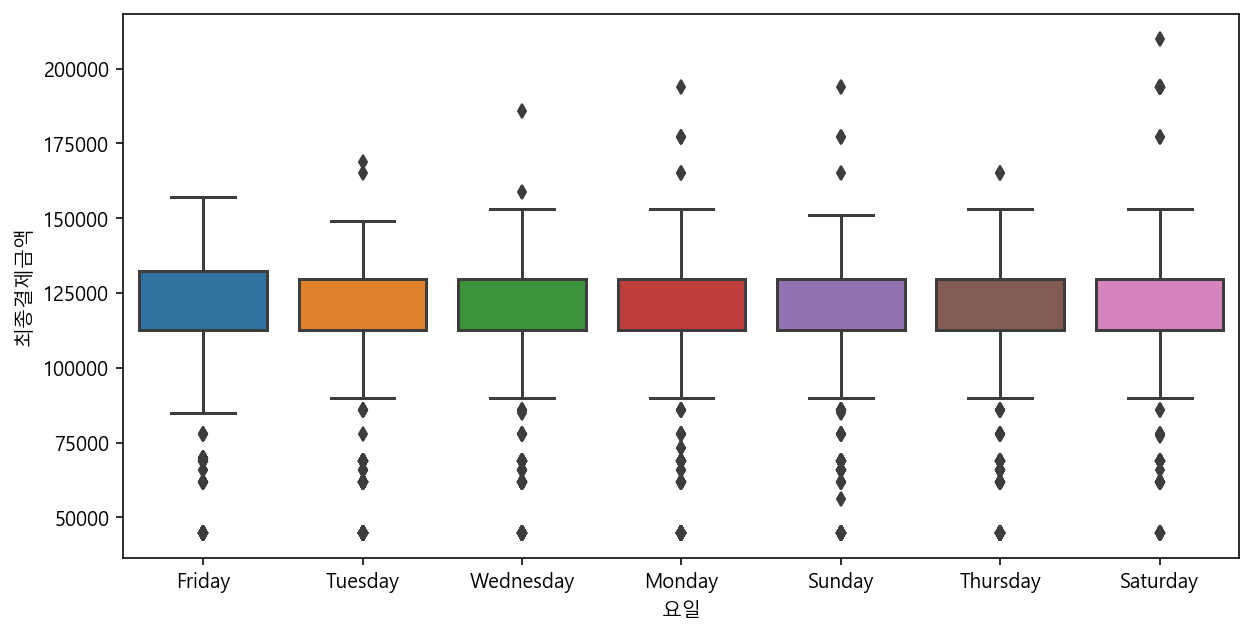

In [32]:
plt.figure(figsize=(10,5))
sns.boxplot(x="요일", y="최종결제금액", data=df1)
plt.show()

#### 16. 요일 별 '최종결제금액'의 평균의 차이가 있는지 통계적 가설검정을 실시하시오.

In [33]:
df_ch2 = df1[['요일', '최종결제금액']]

In [34]:
model = ols('최종결제금액 ~ C(요일)', data = df_ch2).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(요일),2.274448e+10,6.0,8.462078,3.475459e-09
Residual,4.476553e+12,9993.0,NaN,NaN


* 귀무가설 : 요일별 최종결제금액 평균의 차이가 없다.
* 대립가설 : 요일별 최종결제금액 평균의 차이가 있다.
* 통계적 결론 : 요일별 최종결제금액 평균의 차이가 있다.
* 사실적 결론 : 요일별 최종결제금액 평균의 차이가 있다.

#### 17. 월 별 최종금액의 평균을 Pivot_table을 이용하여 계산하시오.

In [35]:
df_month = pd.pivot_table(df1, index='월', values='최종결제금액', aggfunc=np.mean)
df_month 

,최종결제금액
월,
3,109351.456311
4,108583.583062
5,108715.465729
6,120963.879004
7,120435.313977
8,120545.518293


#### 18. 전체 데이터에서, 월별 최종결제금액을 Violin plot 하시오.

<function matplotlib.pyplot.show(*args, **kw)>

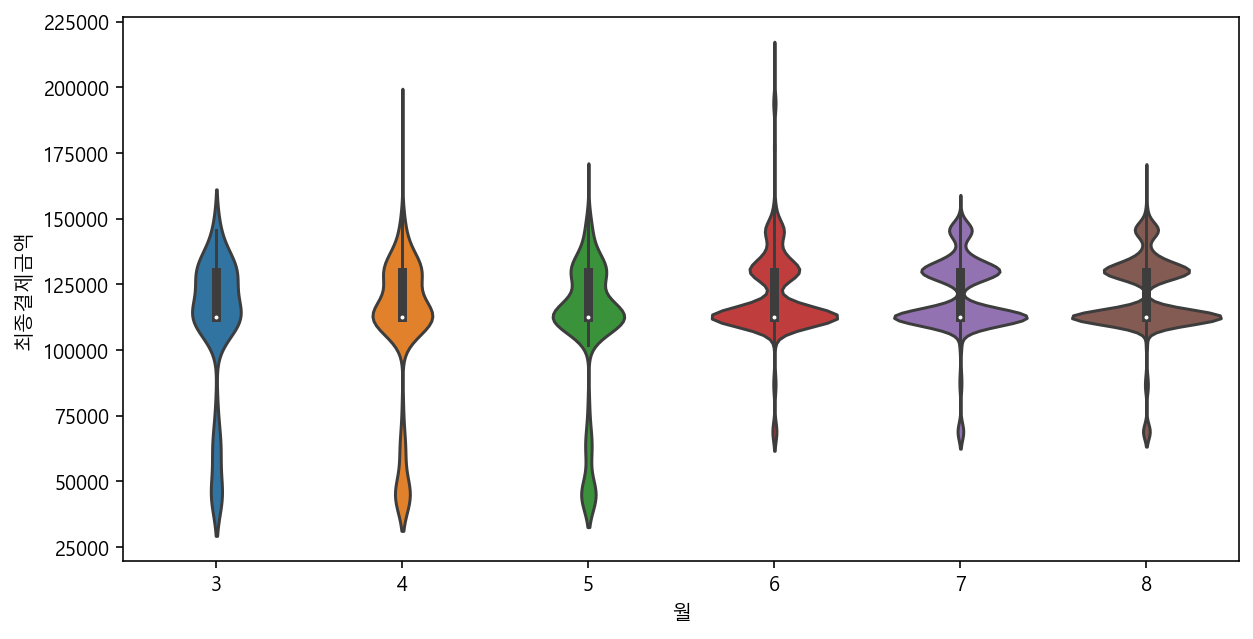

In [36]:
plt.figure(figsize=(10,5))
sns.violinplot(x='월', y='최종결제금액', data=df1)
plt.show

#### 19. 월 별 '최종결제금액'의 평균의 차이가 있는지 통계적 가설검정을 실시하시오.

In [37]:
df_ch3 = df1[['월', '최종결제금액']]

In [38]:
model = ols('최종결제금액 ~ C(월)', data = df_ch3).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(월),3.221296e+11,5.0,154.140975,3.100876e-158
Residual,4.177168e+12,9994.0,NaN,NaN


* 귀무가설 : 월별 최종결제금액 평균의 차이가 없다.
* 대립가설 : 월별 최종결제금액 평균의 차이가 있다.
* 통계적 결론 : 월별 최종결제금액 평균의 차이가 있다.
* 사실적 결론 : 월별 최종결제금액 평균의 차이가 있다.